In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import mglearn
#!pip install mglearn

C:\Users\evasi\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\evasi\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#reading in csv file from github repository
#new data file used as the previous data file was not properly cleaned
url = 'https://raw.githubusercontent.com/evasilva1/data71200sp20/master/Project%202/DATA%202.csv'
vios = pd.read_csv(url, engine='python')

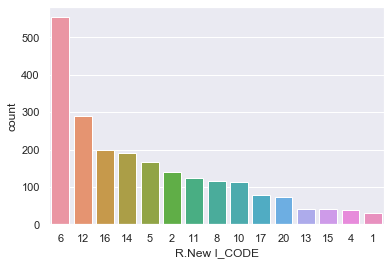

<Figure size 2160x1440 with 0 Axes>

In [3]:
# histograms for categorical data types; New I_CODE (target)
import seaborn as sns
sns.set(style="darkgrid")
inf = sns.countplot(x="R.New I_CODE",data=vios,
                   order=vios["R.New I_CODE"].value_counts().iloc[:15].index)
plt.figure(figsize=(30,20))
plt.show()

In [4]:
target_names = ["1","2","3","4","5","6","7",
               "8","9","10","11","12","13","14",
               "15","16","17","18","19","20"]
feature_names = ["BIN Number","Inspector ID","R.Section of Law",
                "R.I_CODE"]

In [5]:
vios = vios.drop(["Unnamed: 0"],axis=1)
print(vios.dtypes)

BIN Number          int64
Inspector ID        int64
R.Section of Law    int64
R.I_CODE            int64
R.New I_CODE        int64
dtype: object


## **Stratified Shuffle Split**

In [6]:
#setting up for stratified shuffle split
from sklearn.model_selection import StratifiedShuffleSplit

features = vios.loc[:,'BIN Number':'R.I_CODE']
X = features.values
y = vios['R.New I_CODE'].values
print("X.shape: {} y.shape: {}".format(X.shape,y.shape))

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,
                              random_state=42)
for train_index, test_index in split.split(X,y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
#not necessary as the split is done during the pca,
#however kept to show how the items are broken down

X.shape: (2286, 4) y.shape: (2286,)


## Scale data

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#haven't scaled my data before, but after a few attempts
#it seems to aid the process

## **PCA - Feature Selection**

### Unscaled Data

Text(0, 0.5, 'Fourth principal component')

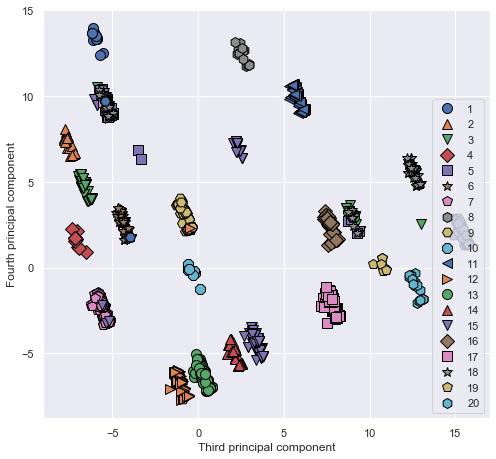

In [43]:
from sklearn.decomposition import PCA

#using unscaled data
# keeping all 4 components
pca0 = PCA(n_components=4)
# fit PCA model to data
pca0.fit(X)

# transform data onto the first two principal components
X_pca0 = pca0.transform(X)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca0[:, 2], X_pca0[:, 3], y)
plt.legend(target_names, loc="lower right")
plt.gca().set_aspect("equal")
plt.xlabel("Third principal component")
plt.ylabel("Fourth principal component")

Text(0, 0.5, 'Principal components')

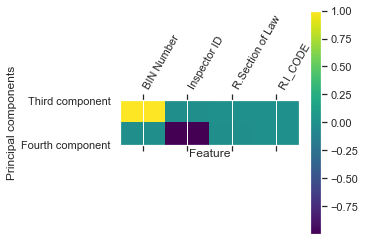

In [9]:
#for unscaled data
plt.matshow(pca0.components_, cmap='viridis')
plt.yticks([0, 1], ["Third component", "Fourth component"])
plt.colorbar()
plt.xticks(range(len(feature_names)),
           feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### Scaled Data

Text(0, 0.5, 'Fourth principal component')

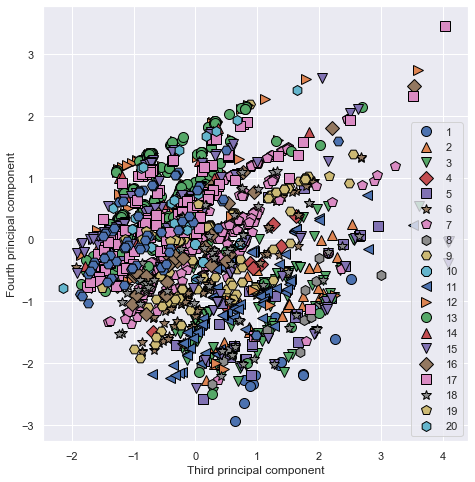

In [45]:
#using scaled data
# keeping all 4 components
pca1 = PCA(n_components=4)
# fit PCA model to data
pca1.fit(X_scaled)

# transform data onto the first two principal components
X_pca1 = pca1.transform(X_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca1[:, 2], X_pca1[:, 3], y)
plt.legend(target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("Third principal component")
plt.ylabel("Fourth principal component")


Text(0, 0.5, 'Principal components')

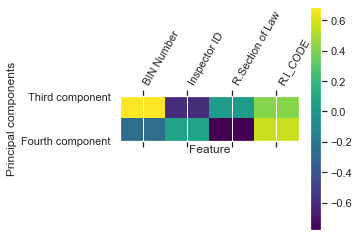

In [11]:
#for scaled data
plt.matshow(pca1.components_, cmap='viridis')
plt.yticks([0, 1], ["Third component", "Fourth component"])
plt.colorbar()
plt.xticks(range(len(feature_names)),
           feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### Explained Variance in PCA

In [12]:
# keep the first two principal components of the data
# scaled data 
pca3 = PCA()
# fit PCA model to data
pca3.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca3.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.2829421  0.27085251 0.23816696 0.20803842]


In [13]:
# keep the first two principal components of the data
# scaled data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca4.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.2829421  0.27085251 0.23816696 0.20803842]


In [14]:
# keep the first two principal components of the data
# unscaled data 
pca5 = PCA()
# fit PCA model to data
pca5.fit(X)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca5.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[9.99999990e-01 9.91205023e-09 2.38087724e-11 1.88271293e-11]


In [15]:
# keep the first two principal components of the data
# unscaled data
pca6 = PCA(n_components=0.95)
# fit PCA model to data
pca6.fit(X)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca6.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.99999999]


### 95% of Variance Explained with Shuffle Split

In [29]:
from sklearn.linear_model import LogisticRegression
# unscaled data
# keep the first two principal components of the data
pca7 = PCA(n_components=0.95)
# fit PCA model to data
pca7.fit(X)
# transform data onto the first two principal components
X_pca7 = pca7.transform(X)

for train_index, test_index in split.split(X_pca7, y):
    X1_train = X_pca7[train_index]
    X1_test = X_pca7[test_index]
    y1_train = y[train_index]
    y1_test = y[test_index]

model=LogisticRegression().fit(X1_train, y1_train)

print("Accuracy on training set: {:.2f}".format(model.score(X1_train, y1_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X1_test, y1_test)))

Accuracy on training set: 0.24
Accuracy on test set: 0.24


In [30]:
#using scaled data
# keep the first two principal components of the data
pca8 = PCA(n_components=0.95)
# fit PCA model to data
pca8.fit(X_scaled)
# transform data onto the first two principal components
X_pca8 = pca8.transform(X_scaled)

for train_index, test_index in split.split(X_pca8, y):
    X2_train = X_pca8[train_index]
    X2_test = X_pca8[test_index]
    y2_train = y[train_index]
    y2_test = y[test_index]

model=LogisticRegression().fit(X2_train, y2_train)

print("Accuracy on training set: {:.2f}".format(model.score(X2_train, y2_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X2_test, y2_test)))

Accuracy on training set: 0.61
Accuracy on test set: 0.61


## **k-Means**

### k-Means with PCA

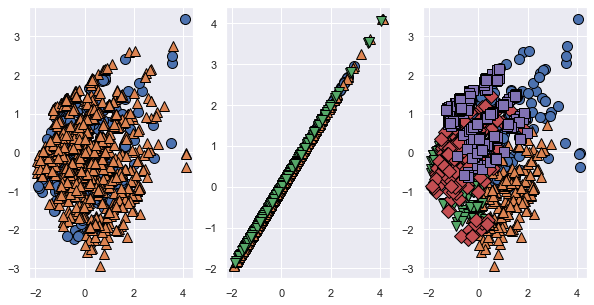

In [40]:
from sklearn.cluster import KMeans
import mglearn

#build the clustering model
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X2_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(X2_train[:, 2], X2_train[:, 3], assignments, ax=axes[0])

# using three cluster centers:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X2_train)
assignments=kmeans.labels_

mglearn.discrete_scatter(X2_train[:, 2], X2_train[:, 2], assignments, ax=axes[1])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X2_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(X2_train[:, 2], X2_train[:, 3], assignments, ax=axes[2])

### Elbow Plot - Optimal Number of Clusters

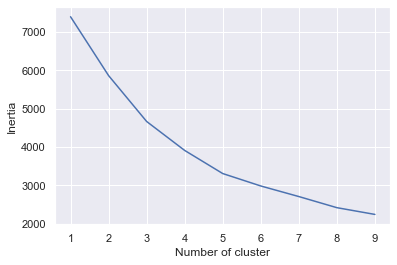

In [32]:
inertiaVals = {}

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X2_train)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Text(0, 0.5, 'Feature 3')

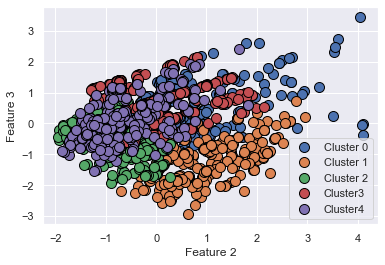

In [34]:
kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(X2_train)

mglearn.discrete_scatter(X2_train[:, 2], X2_train[:, 3], kmeans2.labels_, markers='o')
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2","Cluster3",
           "Cluster4"], loc="best")
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")

### k-Means without PCA

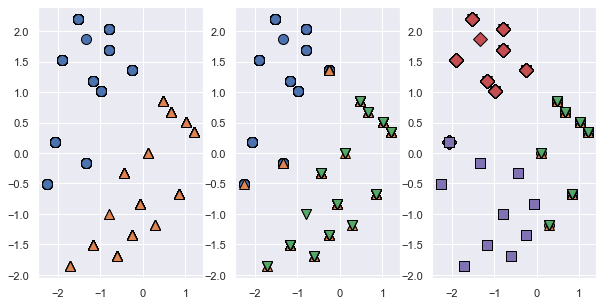

In [64]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X_scaled, y):
    X3_train = X_scaled[train_index]
    X3_test = X_scaled[test_index]
    y3_train = y[train_index]
    y3_test = y[test_index]

#build the clustering model
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X3_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(X3_train[:, 2], X3_train[:, 3], assignments, ax=axes[0])

# using three cluster centers:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X3_train)
assignments=kmeans.labels_

mglearn.discrete_scatter(X3_train[:, 2], X3_train[:, 3], assignments, ax=axes[1])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X3_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(X3_train[:, 2], X3_train[:, 3], assignments, ax=axes[2])

### Elbow Plot - Optimal Number of Clusters

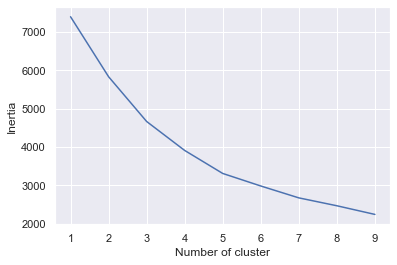

In [65]:
inertiaVals = {}

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X3_train)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Text(0, 0.5, 'Feature 3')

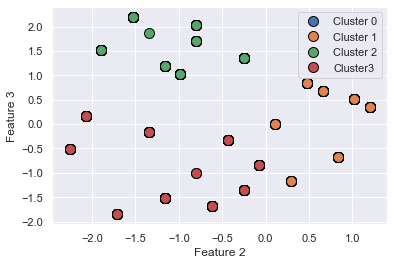

In [68]:
kmeans3 = KMeans(n_clusters=4)
kmeans3.fit(X3_train)

mglearn.discrete_scatter(X3_train[:, 2], X3_train[:, 3], kmeans3.labels_, markers='o')
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2","Cluster3"], loc="best")
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")

## **Agglomerate/Hierachical**

### Agglomerate with PCA

Text(0, 0.5, 'Feature 3')

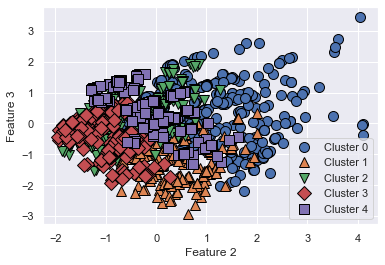

In [61]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5)
assignment = agg.fit_predict(X2_train)

mglearn.discrete_scatter(X2_train[:, 2], X2_train[:, 3], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2",
           "Cluster 3","Cluster 4"], loc="best")
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")

### Hierachical

Text(0, 0.5, 'Cluster distance')

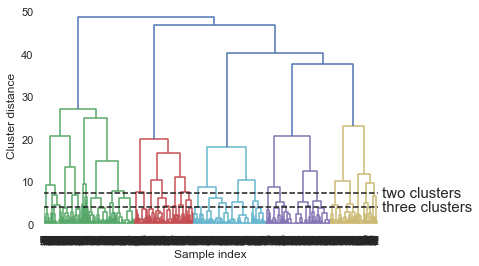

In [58]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X2_train)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

### Agglomerate without PCA

Text(0, 0.5, 'Feature 3')

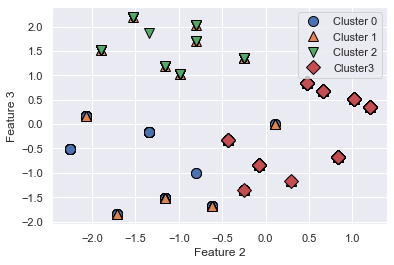

In [69]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4)
assignment = agg.fit_predict(X3_train)

mglearn.discrete_scatter(X3_train[:, 2], X3_train[:, 3], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2",
           "Cluster3"], loc="best")
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")

### Hierachical

Text(0, 0.5, 'Cluster distance')

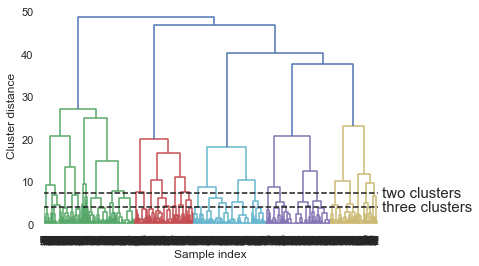

In [70]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X3_train)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

## **DBSCAN**

### DBSCAN with PCA

Text(0, 0.5, 'Feature 1')

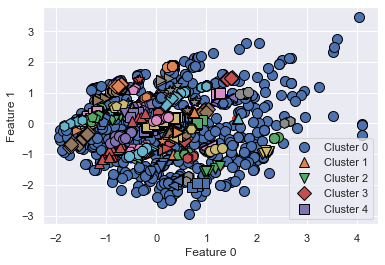

In [77]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=5,eps=0.2)
clusters = dbscan.fit_predict(X2_train)

# plot the cluster assignments
plt.scatter(X2_train[:, 2], X2_train[:, 3], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X2_train[:, 2], X2_train[:, 3], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2",
           "Cluster 3", "Cluster 4"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### DBSCAN without PCA

Text(0, 0.5, 'Feature 3')

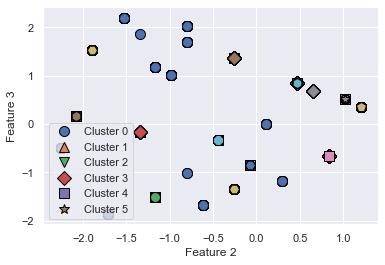

In [76]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=5,eps=0.2)
clusters = dbscan.fit_predict(X3_train)

# plot the cluster assignments
plt.scatter(X3_train[:, 2], X3_train[:, 3], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")

mglearn.discrete_scatter(X3_train[:, 2], X3_train[:, 3], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", 
           "Cluster 3","Cluster 4", "Cluster 5"], loc="best")
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")

## Calculating ARI

### With PCA

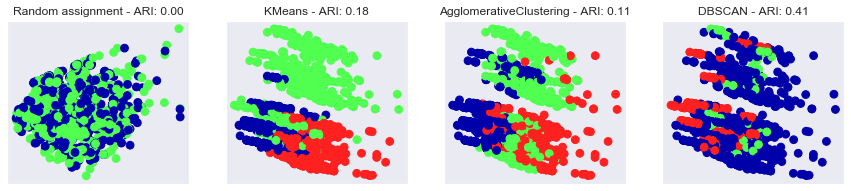

In [79]:
from sklearn.metrics.cluster import adjusted_rand_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=4), AgglomerativeClustering(n_clusters=4),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X2_train))

# plot random assignment
axes[0].scatter(X2_train[:, 2], X2_train[:, 3], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y2_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X2_train)
    ax.scatter(X2_train[:, 0], X2_train[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y2_train, clusters)))


### Without PCA

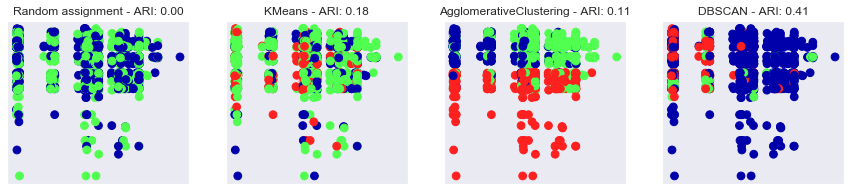

In [80]:
from sklearn.metrics.cluster import adjusted_rand_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=4), AgglomerativeClustering(n_clusters=4),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X3_train))

# plot random assignment
axes[0].scatter(X3_train[:, 0], X3_train[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y3_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X3_train)
    ax.scatter(X3_train[:, 0], X3_train[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))


## Calculating Silhouette Coefficient

### With PCA

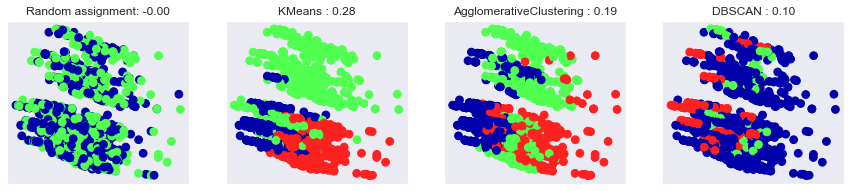

In [82]:
from sklearn.metrics.cluster import silhouette_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X2_train))

# plot random assignment
axes[0].scatter(X2_train[:, 0], X2_train[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X2_train, random_clusters)))

algorithms = [KMeans(n_clusters=4), AgglomerativeClustering(n_clusters=4),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X2_train)
    # plot the cluster assignments and cluster centers
    ax.scatter(X2_train[:, 0], X2_train[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X2_train, clusters)))

### Without PCA

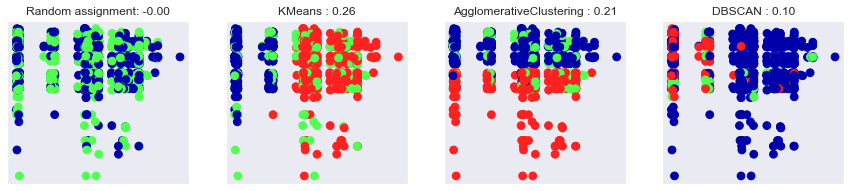

In [83]:
from sklearn.metrics.cluster import silhouette_score

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X3_train))

# plot random assignment
axes[0].scatter(X3_train[:, 0], X3_train[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X3_train, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X3_train)
    # plot the cluster assignments and cluster centers
    ax.scatter(X3_train[:, 0], X3_train[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X3_train, clusters)))